<a href="https://colab.research.google.com/github/walaashaabanAI/chest_xray/blob/main/chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import utils
from keras.callbacks import History
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
import os
from CNN import CNN as cnn
from PrepareData import PrepareData as pr

In [3]:
path_train_normal = './input/train/NORMAL'
path_train_disease = './input/train/PNEUMONIA'
path_test_normal = './input/test/NORMAL'
path_test_disease = './input/test/PNEUMONIA'

In [4]:
# train Normal
X_train_normal = pr.getImages(path_train_normal)
y_train_normal = [1]*len(X_train_normal)

# train Disease
X_train_disease = pr.getImages(path_train_disease)
y_train_disease = [0]*len(X_train_disease)

X_train = X_train_normal + X_train_disease
y_train = y_train_normal + y_train_disease

# test Normal
X_test_normal = pr.getImages(path_test_normal)
y_test_normal = [1]*len(X_test_normal)

# test Disease
X_test_disease = pr.getImages(path_test_disease)
y_test_disease = [0]*len(X_test_disease)

X_test = X_test_normal + X_test_disease
y_test = y_test_normal + y_test_disease


In [5]:
df = pd.DataFrame({'X':X_train+X_test, 'y':y_train+y_test})


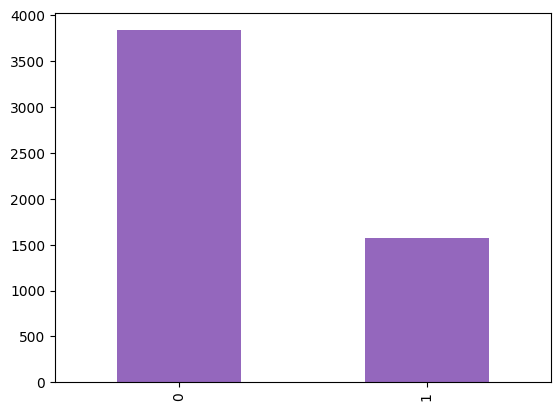

In [6]:
df['y'].value_counts().plot(kind='bar', color=sns.color_palette()[4]);

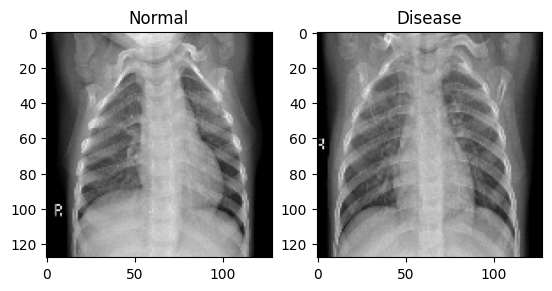

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(X_train_normal[0]), plt.title("Normal");
plt.subplot(1, 2, 2)
plt.imshow(X_train_disease[2]), plt.title("Disease");

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = utils.to_categorical(y_train, num_classes=2)
y_test = utils.to_categorical(y_test, num_classes=2)

In [9]:
model = cnn(X_train, X_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [10]:
model.y_pred = utils.to_categorical(model.y_pred, num_classes=2)

In [11]:
print(classification_report(y_test, model.y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       390
           1       1.00      0.22      0.36       234

   micro avg       0.71      0.71      0.71       624
   macro avg       0.84      0.61      0.58       624
weighted avg       0.80      0.71      0.64       624
 samples avg       0.71      0.71      0.71       624



In [12]:
model.y_test = np.argmax(model.y_test, axis=1)
model.y_pred = np.argmax(model.y_pred, axis=1)

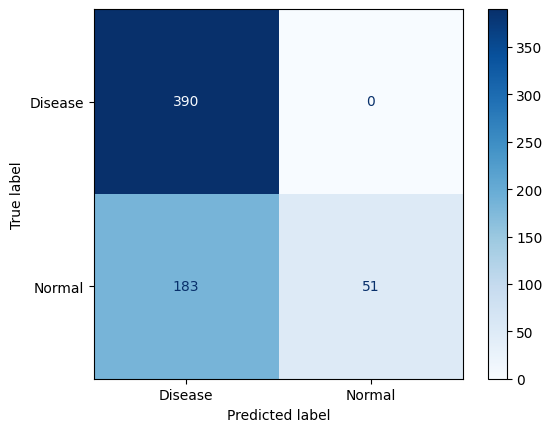

In [13]:
metrics = confusion_matrix(model.y_test, model.y_pred)
ConfusionMatrixDisplay(metrics, display_labels = ["Disease","Normal"]).plot(cmap=plt.cm.Blues);